# 6.2 Exploring Relationships

1 Import Data and Libraries
2 Define Variables to Perform Exploratory Analysis On
3 Create Correlation Matrix Heat Map
4 Create Scatter Plot of Variables 
5 Create Pair Plot of Data
6 Create a Categorical Plot
7 Going back to the questions
    -Hypothesis

# 1 Import Data and Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check matplotlib version
matplotlib.__version__

'3.4.3'

In [3]:
# ensure my charts will show up without calling them
%matplotlib inline

In [4]:
# Import Data
df = pd.read_csv(r'C:\Users\419182\OneDrive - JELDWEN Inc\Desktop\Data Analytics\Clean2019BattingData.csv', low_memory = False)

# 2 Define variables from data set to perform exploratory analysis on

In [5]:
# check columns 
df.columns

Index(['Player', 'Batting.Order', 'Pos', 'AB', 'R', 'H', 'RBI', 'BB', 'SO',
       'Plate App', 'BA', 'OBP', 'SLG', 'OPS', 'Pitches Seen', 'Strikes Seen',
       'WPA', 'RE24', 'Put Out', 'Assists', 'Details', 'X2B', 'X3B', 'HR',
       'Intentional Walk', 'Sac Fly', 'GDP', 'SB', 'CS', 'HBP', 'Sac Bunt',
       'Team', 'Team.Abbrev', 'Opponent', 'Opponent.Abbrev', 'Team.R',
       'Team.H', 'Team.E', 'Opponent.R', 'Opponent.H', 'Opponent.E', 'Innings',
       'Game.ID', 'Date', 'Game.Time', 'H.A', 'Sky', 'Stadium', 'Temperature',
       'Weather', 'Wind.Direction', 'Wind.Speed', 'Double.Header',
       'Precipitation', 'Location', 'Game Region'],
      dtype='object')

In [6]:
# create a new dataframe with variables that relate to questions asked
df2 = df[['Game Region', 'Precipitation', 'H', 'Team.H', 'SO', 'Team.R', 'Opponent.R', 'Opponent.H', 'X2B', 'X3B', 'Pitches Seen', 'Weather', 'Temperature']]

In [7]:
# check columns of new dataframe
df2.columns

Index(['Game Region', 'Precipitation', 'H', 'Team.H', 'SO', 'Team.R',
       'Opponent.R', 'Opponent.H', 'X2B', 'X3B', 'Pitches Seen', 'Weather',
       'Temperature'],
      dtype='object')

# 3 Create a Correlation Matrix Heat Map 

In [8]:
# create matrix using pandas
df2.corr()

,H,Team.H,SO,Team.R,Opponent.R,Opponent.H,X2B,X3B,Pitches Seen,Temperature
H,1.000000,0.268634,-0.014159,0.213181,-0.005190,0.006217,0.487209,0.149975,0.288399,0.021734
Team.H,0.268634,1.000000,-0.047896,0.784863,0.089703,0.142811,0.133792,0.044772,0.160212,0.089938
SO,-0.014159,-0.047896,1.000000,-0.049148,-0.002432,-0.002594,-0.007275,-0.002733,0.345379,-0.031568
Team.R,0.213181,0.784863,-0.049148,1.000000,0.050082,0.091819,0.117707,0.043587,0.158335,0.069511
Opponent.R,-0.005190,0.089703,-0.002432,0.050082,1.000000,0.785114,-0.013189,0.005835,-0.013143,0.069197
Opponent.H,0.006217,0.142811,-0.002594,0.091819,0.785114,1.000000,-0.008958,0.009851,0.010944,0.089279
X2B,0.487209,0.133792,-0.007275,0.117707,-0.013189,-0.008958,1.000000,0.015531,0.133588,0.006377
X3B,0.149975,0.044772,-0.002733,0.043587,0.005835,0.009851,0.015531,1.000000,0.045161,0.007712
Pitches Seen,0.288399,0.160212,0.345379,0.158335,-0.013143,0.010944,0.133588,0.045161,1.000000,-0.031530
Temperature,0.021734,0.089938,-0.031568,0.069511,0.069197,0.089279,0.006377,0.007712,-0.031530,1.000000


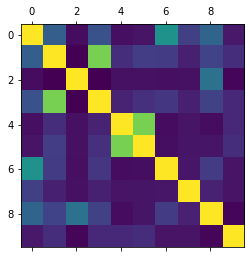

In [9]:
# create a correlation heat map using matplotlib
plt.matshow(df2.corr())

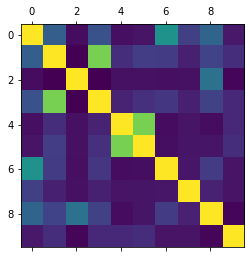

In [10]:
# save figure 
plt.matshow(df2.corr())
plt.savefig("out.png")

In [11]:
# check directory
cwd = os.getcwd()
cwd

'C:\\Users\\419182\\Achievement 6 Baseball Analysis'

Text(0.5, 1.0, 'Baseball Correlation Matrix')

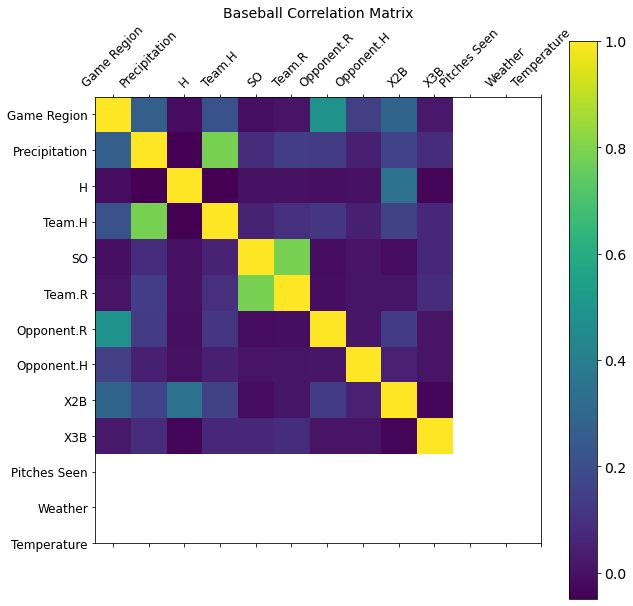

In [12]:
# add labels and a legend to the heat map
f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Baseball Correlation Matrix', fontsize=14) # add title

I already know that this is harder to see compared to using seaborn so I am now going to make the same map in seaborn so it is easier to see. 

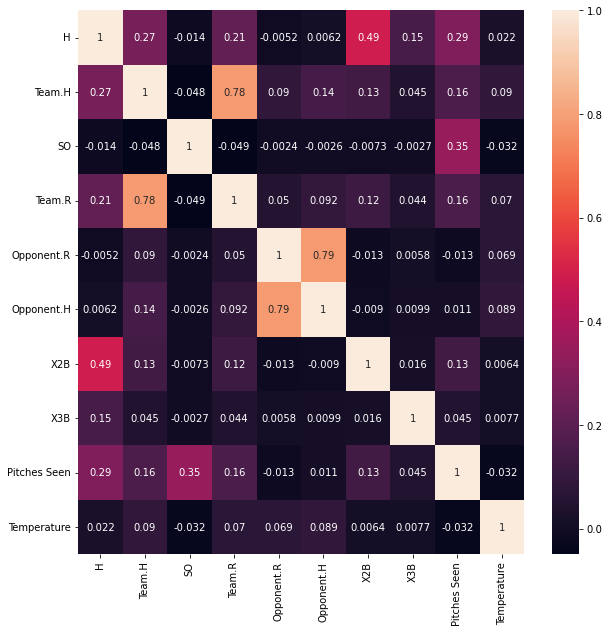

In [13]:
# create a subplot
f,ax = plt.subplots(figsize=(10,10))
# create a correlation heat map in seaborn and apply a heatmap onto the correltaiton matrix 
corr = sns.heatmap(df2.corr(), annot = True, ax = ax)

The strongest correlations are in the opponent runs/ hits and the team runs / hits.  These make sense as hits in a game lead to runs.  As a reuslt of these being expected, I will refrain from analyzing them in the scatter. Instead, I am going to analyze X2B and H (doubles and hits).  I will also analyze pitches seen and SO (strike outs).  There is no correlation between temperature and any of the variables. 

# 4 Create a Scatter Plot of Variables

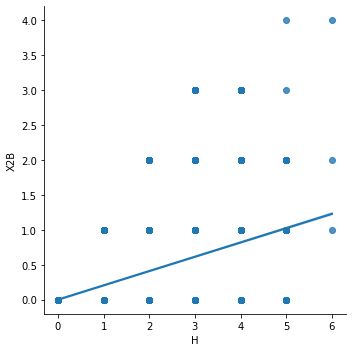

In [14]:
# create a sactter plot for the hits and doubles
sns.lmplot(x = 'H', y = 'X2B', data = df2)

I believe this is a good example to show that I should not base my analysis of doubles and hits on solely the correlation.  Although it has a moderate correlation, it is evident in the scatterplot that once the player has 6 hits within the game, the doubles could actually be less than if the team had 5 hits.  

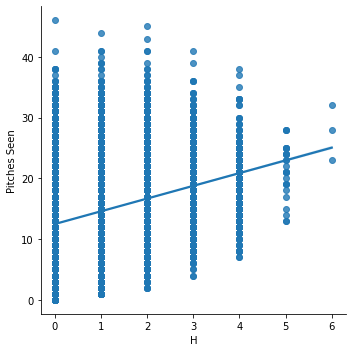

In [15]:
# create a scatter plot for pitches seen and hits 
sns.lmplot(x = 'H', y = 'Pitches Seen', data = df2)

This is interesting as well.  There is a positive weak correlation between the two variables, but based on the scatterplot, a player who has 5 hits in a game, may not have seen the most picthes and tends to not see more pitches than a player with 4 hits.  This is interesting and brings me to the conclusion that players are swinging earlier in counts when they are getting a chance to hit the ball.  

# 5 Create a pair plot of the entire data set 

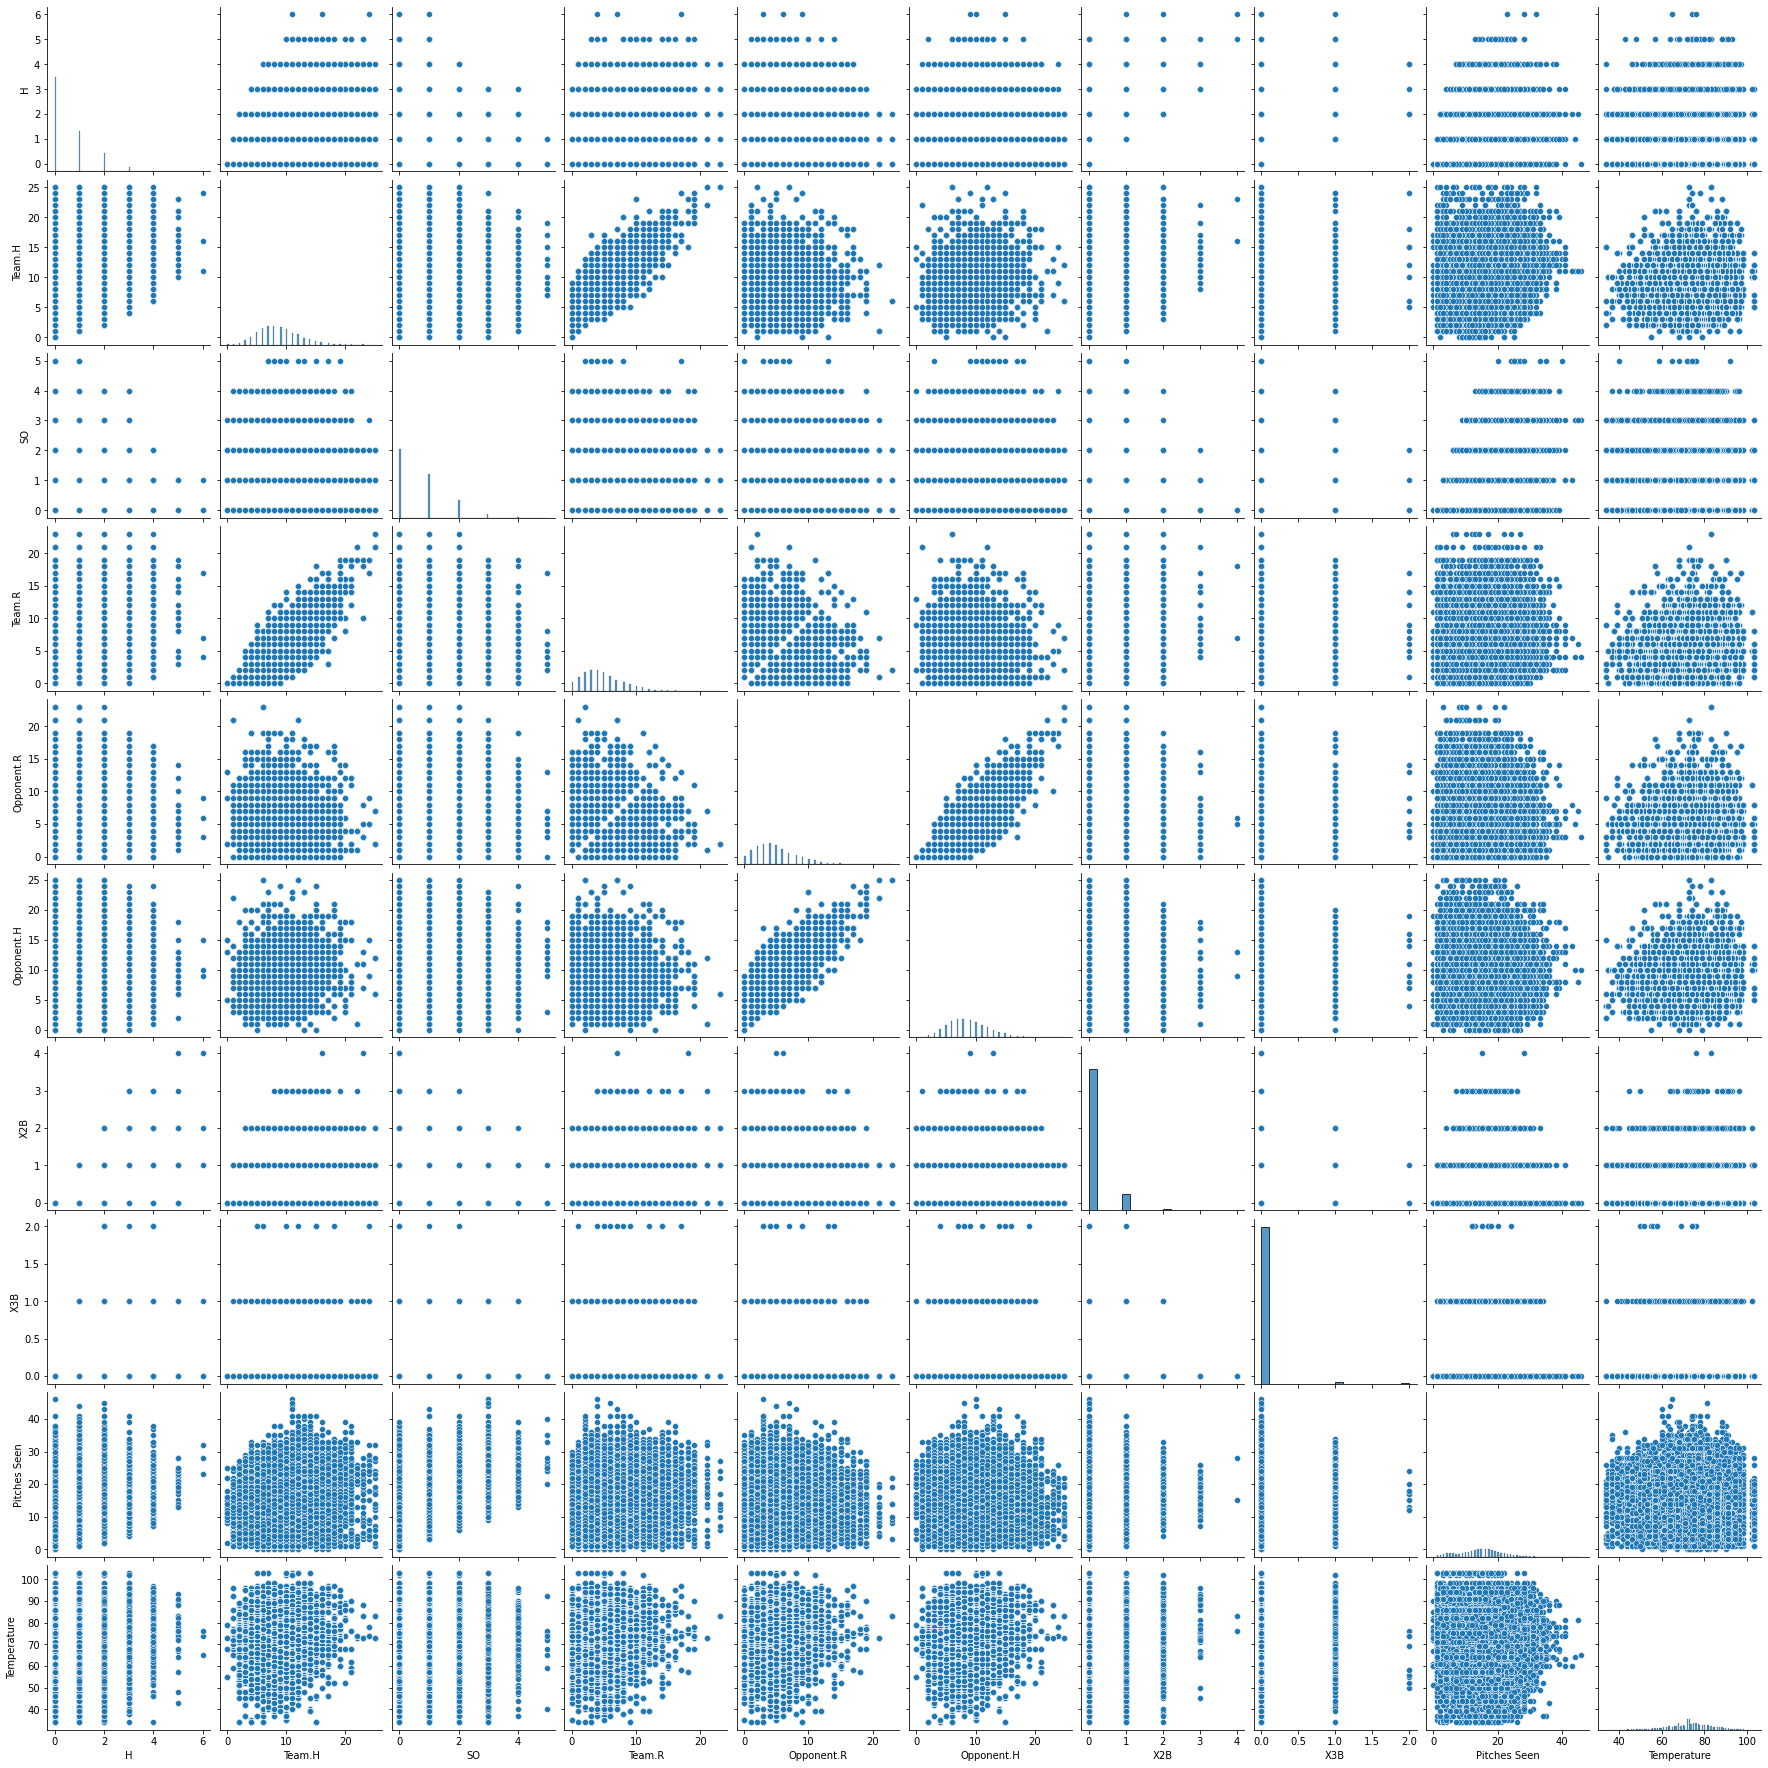

In [16]:
# create a pair plot 
pp = sns.pairplot(df2)

Viewing the plots in this way helps me to better understand the variables with limited correlation.  For example, when a player sees around 40 pitches per game (rare and has fewer data points)  the temp is usually moderate to high.  Who knows, maybe players do not want to stand out in the cold longer.  Another example is the opponent hits and team runs.  When a team scores the high runs, there are more data points with low opponent hits.  This could indicate that momentum does exist and the more runs a team scores, the flatter the opposing team gets. 

# 6 Create a Categorical Plot

In [17]:
# look at the temperature variable
df2['Temperature'].value_counts()

72     4722
73     4548
68     3115
76     3095
75     3047
       ... 
42       58
41       57
35       30
38       30
102      29
Name: Temperature, Length: 66, dtype: int64

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

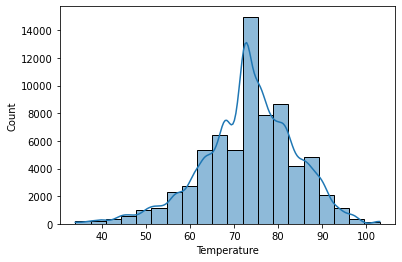

In [18]:
# look at a histogram of temperature
sns.histplot(df2['Temperature'], bins = 20, kde = True)

In [19]:
# create temperature categories 
df2.loc[df2['Temperature'] <= 50, 'Temp Desc'] = 'Cold'
df2.loc[(df2['Temperature'] >= 51) & (df2['Temperature'] <= 70), 'Temp Desc'] = 'Moderate'
df2.loc[df2['Temperature'] > 71, 'Temp Desc'] = 'Warm'

C:\Users\419182\Newanaconda\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\419182\Newanaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
# look at new column
df2['Temp Desc'].value_counts()

Warm        44224
Moderate    21838
Cold         2098
Name: Temp Desc, dtype: int64

In [21]:
# check columns
df2.columns

Index(['Game Region', 'Precipitation', 'H', 'Team.H', 'SO', 'Team.R',
       'Opponent.R', 'Opponent.H', 'X2B', 'X3B', 'Pitches Seen', 'Weather',
       'Temperature', 'Temp Desc'],
      dtype='object')

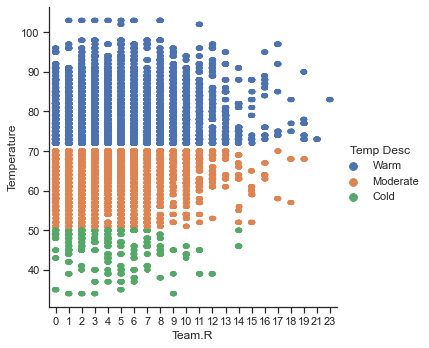

In [22]:
# create a categorical plot using the categories created 
sns.set(style="ticks")
g = sns.catplot(x="Team.R", y="Temperature", hue="Temp Desc", data=df2)

The plot shows that the highest number of team runs were scored in moderate to warm weather.  Teams did not score more than 14 runs when the weather was considered cold (0-50F).  It appears that the majority of games were played in the warm (>71F) weather.   

#  7 Going back to the questions

Based on my previous asked questions, I can answer one of them.  The rest of the questions are in regard to the region.  Since I was looking at correlation, I will wait to answer region questions.  Now, I can answer the question of how weather impacts numer of pitches seen.  This analysis showed how temperature impacted pitches seen, and the answer is that there is virtually no correlation.  Although there was no correlation, it appears that the data points with the highest pitches seen occured in the more moderate to warm temperature range.  For further questions, I would like to know how the temperature impacted base on balls or walks during the season?  I also would like to know how wind sped impacted home runs. 

### Hypothsis
My hypothesis is that higher wind speeds (>10), have higher recorded Opponent hits. 

In [23]:
df2.to_csv(r'C:\Users\419182\OneDrive - JELDWEN Inc\Desktop\Data Analytics\Clean2019BattingDataCLuster.csv', index = False)